# Library

#Evaluasi
saya menggunakan kmeans disini karena pada data yang di berikan sangat lah
besar dan metode yang baik untuk menangani ini adalah kmeans ini karena dia memilki kompleksitas yang lebih rendah

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

# Dataset

In [12]:
# Dataset
df = pd.read_csv("https://raw.githubusercontent.com/jhnwlkn/Machine-Leaning/main/customer_support_data.csv")

<ipython-input-12-049a27fbbbfd>:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://raw.githubusercontent.com/jhnwlkn/Machine-Leaning/main/customer_support_data.csv")


In [13]:
print(df.shape)

(85907, 20)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                10527 non-null  object 
 1   channel_name             10527 non-null  object 
 2   category                 10527 non-null  object 
 3   Sub-category             10527 non-null  object 
 4   Customer Remarks         3423 non-null   object 
 5   Order_id                 6030 non-null   object 
 6   order_date_time          1698 non-null   object 
 7   Issue_reported at        10527 non-null  object 
 8   issue_responded          10527 non-null  object 
 9   Survey_response_Date     10527 non-null  object 
 10  Customer_City            1684 non-null   object 
 11  Product_category         1696 non-null   object 
 12  Item_price               1698 non-null   float64
 13  connected_handling_time  10 non-null     float64
 14  Agent_name            

In [15]:
# Menampilkan ringkasan statistik deskriptif
print(df.describe())

          Item_price  connected_handling_time    CSAT Score
count    1698.000000                10.000000  10527.000000
mean     6516.472909               298.100000      4.207372
std     13201.741722               173.490602      1.416707
min         9.000000                 0.000000      1.000000
25%       426.500000               205.250000      4.000000
50%       999.000000               271.500000      5.000000
75%      4419.000000               403.250000      5.000000
max    134999.000000               574.000000      5.000000


In [16]:
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,1698.000000,10.000000,10527.000000
mean,6516.472909,298.100000,4.207372
std,13201.741722,173.490602,1.416707
min,9.000000,0.000000,1.000000
25%,426.500000,205.250000,4.000000
50%,999.000000,271.500000,5.000000
75%,4419.000000,403.250000,5.000000
max,134999.000000,574.000000,5.000000


In [21]:
df = df.head(10000)

**Prerocessing**

In [22]:
# Menghapus kolom 'Unique id' karena tidak diperlukan untuk proses clustering
df.drop('Unique id', axis=1, inplace=True)

# Mengisi nilai yang hilang dengan nilai rata-rata menggunakan SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df[['connected_handling_time', 'CSAT Score']])

# Standarisasi fitur-fitur
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_imputed)

visualisasi metode elbow

In [25]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

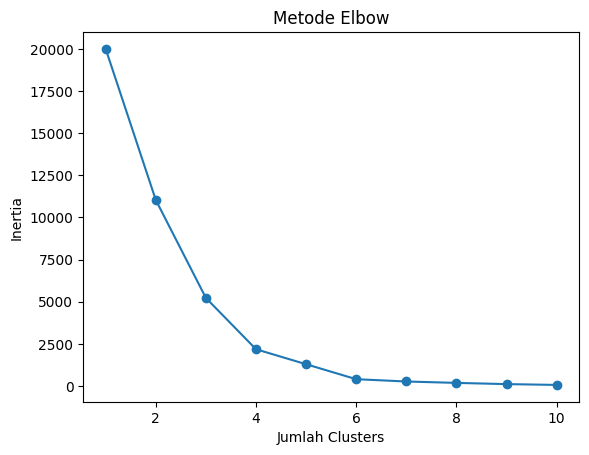

In [26]:
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Clusters')
plt.ylabel('Inertia')
plt.show()

# Modelling

In [40]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [41]:
df['Cluster'] = kmeans.labels_

nilai silhouette

In [42]:
silhouette_avg = silhouette_score(scaled_df, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.9489763521633442


# Visualisasi clustering

In [43]:
X = df[['Item_price', 'CSAT Score']].values

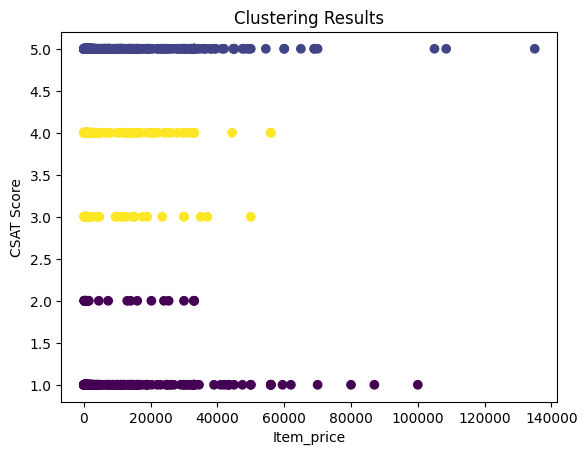

In [47]:
plt.scatter(df['Item_price'], df['CSAT Score'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Item_price')
plt.ylabel('CSAT Score')
plt.title('Clustering Results')
plt.show()


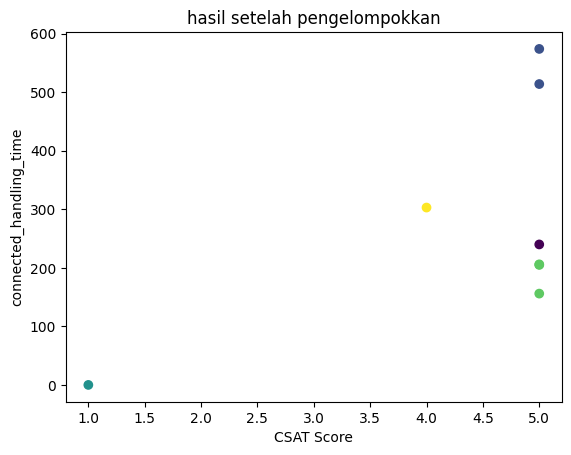

In [48]:
plt.scatter(df['CSAT Score'],df['connected_handling_time'],c=df['Cluster'],cmap='viridis')
plt.title('hasil setelah pengelompokkan')
plt.xlabel('CSAT Score')
plt.ylabel('connected_handling_time')
plt.show()

# Kesimpulan

semakin tinngi nilai silhouette nya menunjukkan bahwa yang dihasilkan oleh kmeans itu cukup baik,dan evaluasi yang baik dicapai dengan nilai silhouette nyaa mendekati satu atau score nyaa menjadi 1


